**Intersection over Union (IOU)** -- how accurate the bounding box prediction is. Shows the difference between true and predicted area.

**F1 score** -- calcualtes the average between precision and recall.

Cosine Similarity, Euclidean Distance and L2 form -- deepface

In [1]:
from deepface import DeepFace

Directory  /home/daria /.deepface created
Directory  /home/daria /.deepface/weights created


In [32]:
import pandas as pd
import numpy as np

In [313]:
target = pd.read_csv('/home/daria/target_labels.csv')

path = '/home/daria/photos/'
target['path'] = target.img_name.apply(lambda row: path + row)

In [314]:
target

,img_name,x1,y1,x2,y2,path
0,2688539_1643555528_0NLNmreyxd0.jpg,143.000000,150.000000,223.000000,237.000000,/home/daria/photos/2688539_1643555528_0NLNmrey...
1,2688539_1643555528_0NLNmreyxd0.jpg,224.000000,115.000000,299.000000,206.000000,/home/daria/photos/2688539_1643555528_0NLNmrey...
2,2688539_1643548587_TPie3WlXvOE.jpg,195.000000,170.000000,218.000000,203.000000,/home/daria/photos/2688539_1643548587_TPie3WlX...
3,2688539_1643548135_srZUGrkdgGY.jpg,49.000000,54.000000,225.000000,302.000000,/home/daria/photos/2688539_1643548135_srZUGrkd...
4,2688539_1643546752_y_PquLQ3bVY.jpg,105.000000,38.000000,258.000000,253.000000,/home/daria/photos/2688539_1643546752_y_PquLQ3...
5,2688539_1643536371_uA5S96cDz94.jpg,125.000000,192.000000,195.000000,266.000000,/home/daria/photos/2688539_1643536371_uA5S96cD...
6,2688539_1643534719_PXMY_unjsMs.jpg,146.000000,230.000000,199.000000,298.000000,/home/daria/photos/2688539_1643534719_PXMY_unj...
7,2688539_1643534717_avidk8bUOXg.jpg,174.000000,475.000000,215.000000,517.000000,/home/daria/photos/2688539_1643534717_avidk8bU...
8,2688539_1643530063_DuUPDTSMnms.jpg,156.000000,168.000000,175.000000,194.000000,/home/daria/photos/2688539_1643530063_DuUPDTSM...
9,2688539_1643530063_DuUPDTSMnms.jpg,191.525169,165.619835,210.308039,183.651390,/home/daria/photos/2688539_1643530063_DuUPDTSM...


In [277]:
hyp = lambda x1, x2, y1, y2: np.sqrt(
    (x2-x1)**2 + (y2-y1)**2
)

def pic(**kwargs):
    im = imageio.imread(kwargs['path'])
    fig, ax = plt.subplots()
    ax.imshow(im)
    d = hyp(kwargs['x1'], kwargs['x2'], kwargs['y1'], kwargs['y2'])
    rect = patches.Rectangle(
        (kwargs['x1'], kwargs['y1']),
         kwargs['x2'],
         kwargs['y2'],
         linewidth=1, edgecolor='r', facecolor='none')
 
    ax.add_patch(rect)
    fig.show()
    return ax

def get_iou(bb1, bb2):
    
    bb1['x1'] = bb1['x']
    bb1['y1'] = bb1['y']
    bb1['y2'] = bb1['h'] + bb1['y']
    bb1['x2'] = bb1['w'] + bb1['x']
    
    bb2['x1'] = bb2['x']
    bb2['y1'] = bb2['y']
    bb2['y2'] = bb2['h'] + bb2['y']
    bb2['x2'] = bb2['w'] + bb2['x']

    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

def get_rect(**kwargs):
    h = hyp(kwargs['x1'], kwargs['x2'], kwargs['y1'], kwargs['y2'])
    l = h / np.sqrt(2)
    return {
        'x': kwargs['x1'], 'y': kwargs['y1'],
        'w': l, 'h': l
    }

In [305]:
models = ['opencv', 'ssd', 'mtcnn', 'retinaface',]

results = {}
for model in models:
    ious = []
    for i, img in target.iterrows():
        try:
            face = DeepFace.analyze(img.path, actions = ['emotion'],
                                    enforce_detection=False, 
                                    detector_backend=model
            )
        except ValueError:
            continue
        ious.append(
            get_iou(
                get_rect(**img),
                face['region']
            )
        )
    results[model] = ious


1/1 [==============================] - 0s 15ms/step


4/4 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


Text(0, 0.5, 'IOUs')

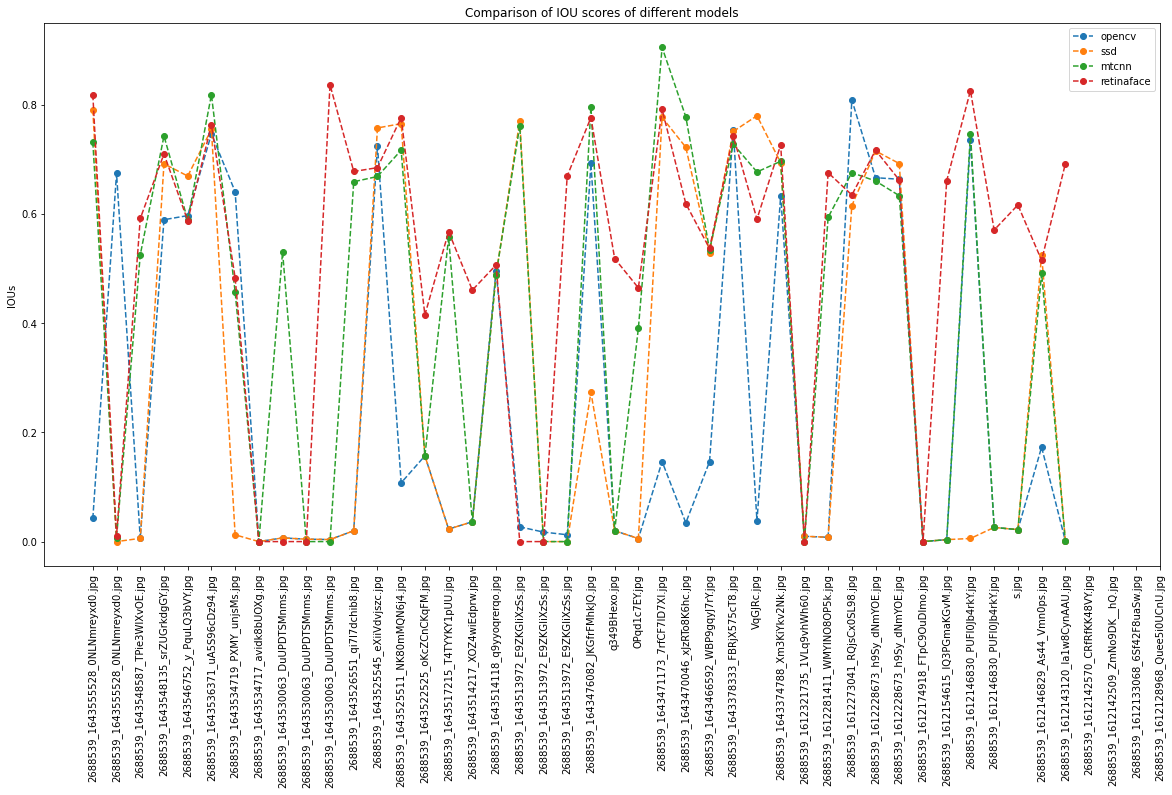

In [315]:
plt.figure(figsize=(20, 10))
for k, v in results.items():
    plt.plot(v, '--o', label=k)

plt.xticks(range(len(target.img_name)), target.img_name, rotation=90)
plt.legend()
plt.title('Comparison of IOU scores of different models')
plt.ylabel('IOUs')
    